<a href="https://colab.research.google.com/github/jungeun919/Deep_learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________

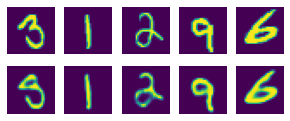

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조 확인
autoencoder.summary()

# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토 인코더 모델에 넣기

plt.figure(figsize=(7, 2)) # 출력 이미지 크기 정하기

for i, image_index in enumerate(random_test):
  # 랜덤으로 뽑은 이미지를 차례로 나열
  ax = plt.subplot(2, 7, i+1)
  # 테스트할 이미지를 먼저 그대로 보여줌
  plt.imshow(X_test[image_index].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)
  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_index].reshape(28, 28))
  ax.axis('off')
plt.show()